# Task2: Handling Images

In [11]:
from cv2 import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui

In [12]:
I = cv2.imread('image1.jpg')
I = cv2.resize(I, (1080, 720))

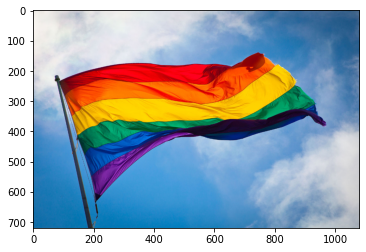

In [13]:
plt_img = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(plt_img)

In [14]:
yuv_img = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)

## Convert part of image to YUV

In [15]:
def replace_rect(img, x1, y1, width, height):
    rect = yuv_img[y1:y1+height, x1:x1+width]
    (row, col, channel) = rect.shape
    
    x2 = x1 + col
    y2 = y1 + row

    img[y1:y2, x1:x2] = rect

In [16]:
def draw(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        size = 201
        replace_rect(I, x, y, size, size)
        color = (0, 0, 255)
        thickness = 5
        cv2.rectangle(I, (x, y), (x+size+thickness, y+size+thickness), color, thickness)

In [17]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)

while(1):
    cv2.imshow('image',I)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyWindow('image')